In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx


In [48]:
main_dir = "/kaggle/input/widsdatathon2025"
train_connectome = pd.read_csv(f"{main_dir}/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_connectome = pd.read_csv(f"{main_dir}/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
train_quantitative = pd.read_excel(f"{main_dir}/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")
test_quantitative = pd.read_excel(f"{main_dir}/TEST/TEST_QUANTITATIVE_METADATA.xlsx")
train_solutions = pd.read_excel(f"{main_dir}/TRAIN/TRAINING_SOLUTIONS.xlsx")
sample_submission = pd.read_excel(f'{main_dir}/SAMPLE_SUBMISSION.xlsx')
train_categorical = pd.read_excel(f'{main_dir}/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
test_categorical = pd.read_excel(f'{main_dir}/TEST/TEST_CATEGORICAL.xlsx')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [50]:
print(f"shape of functional MRI connectome matrices", train_connectome.shape)
print(f"shape of functional MRI quantitative metadata", train_quantitative.shape)
print(f"shape of functional MRI metadata", train_categorical.shape)

shape of functional MRI connectome matrices (1213, 19901)
shape of functional MRI quantitative metadata (1213, 19)
shape of functional MRI metadata (1213, 10)


In [51]:
train_connectome.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.041287,0.069722,0.091007,0.066852,0.000252,0.014128,-0.002914,...,0.011075,-0.004938,-0.004378,0.001610,0.115171,0.049984,0.058144,0.093527,0.089403,0.128946
std,0.064178,0.054026,0.057495,0.043491,0.044222,0.049189,0.046864,0.049046,0.038205,0.042462,...,0.049632,0.046536,0.042900,0.047424,0.057128,0.051664,0.057674,0.054594,0.058036,0.058490
min,-0.183279,-0.059932,-0.145566,-0.127827,-0.072043,-0.079184,-0.105722,-0.164297,-0.137728,-0.148490,...,-0.161666,-0.176523,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.085566,-0.204160,-0.083077
25%,0.018482,0.086102,0.026548,0.014457,0.042462,0.057614,0.036934,-0.031358,-0.010635,-0.030538,...,-0.021376,-0.033424,-0.033798,-0.030132,0.080291,0.015827,0.022316,0.059621,0.053224,0.090459
50%,0.058276,0.123220,0.061339,0.043246,0.067066,0.086494,0.067247,0.002549,0.016130,-0.002604,...,0.010254,-0.004683,-0.003724,0.000990,0.113640,0.052705,0.059151,0.093397,0.088612,0.127913
75%,0.100103,0.154518,0.099056,0.068408,0.096504,0.119404,0.095117,0.031053,0.038770,0.024507,...,0.044165,0.024913,0.024007,0.032268,0.150524,0.082526,0.095192,0.127144,0.127613,0.166523
max,0.321522,0.390895,0.278429,0.189825,0.317500,0.316811,0.270018,0.168196,0.145364,0.128301,...,0.194616,0.183152,0.180562,0.192015,0.375635,0.228748,0.322084,0.348153,0.267162,0.414304


In [52]:
train_categorical.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [53]:
train_categorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [54]:
train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [55]:
train_categorical = train_categorical.merge(train_connectome, on='participant_id', how = 'left')


In [56]:
df_train = train_categorical.merge(train_solutions, on='participant_id', how='left')

In [57]:
df_train.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1


# Repeating same for the test datasets

In [58]:
test_quantitative = test_quantitative.merge(test_categorical, on='participant_id', how='left')

In [59]:
df_test = test_quantitative.merge(test_connectome, on='participant_id', how='left')

In [60]:
df_test.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [61]:
df_train.shape, df_test.shape

((1213, 19912), (304, 19928))

In [62]:
df_train.set_index('participant_id', inplace = True)
df_test.set_index('participant_id', inplace = True)
targets = ['ADHD_Outcome', 'Sex_F']
features = df_test.columns

In [63]:

# !pip install ydata-profiling

In [64]:
# import ydata_profiling as yp
# profile = yp.ProfileReport(df_train)
# profile.to_notebook_iframe()
# profile.to_file('eda_report.html')

## Key Findings

### High Correlations

- ADHD_Outcome is highly correlated with SDQ_SDQ_Externalizing and other fields.

- APQ_P_APQ_P_INV is highly correlated with APQ_P_APQ_P_PP.

- APQ_P_APQ_P_PM is highly correlated with MRI_Track_Age_at_Scan.

- SDQ_SDQ_Difficulties_Total has strong correlations with multiple SDQ-related fields.

### Missing Values

- MRI_Track_Age_at_Scan has 360 missing values (29.7%).

### Zero Values

- SDQ_SDQ_Conduct_Problems has 348 zeros (28.7%).

- SDQ_SDQ_Emotional_Problems has 299 zeros (24.6%).

- SDQ_SDQ_Generating_Impact has 204 zeros (16.8%).

### Variable Summary

#### Categorical Variables

- participant_id: Unique identifier (100% distinct).

- ADHD_Outcome: Binary variable (1: 831, 0: 382).

- Sex_F: Binary variable (0: 797, 1: 416).

#### Numerical Variables

- EHQ_EHQ_Total: Mean = 58.88, Min = -100, Max = 100, 12% negative values.

- ColorVision_CV_Score: Mean = 13.16, Min = 0, Max = 14.

- APQ_P_APQ_P_CP: Mean = 3.78, Min = 0, Max = 12.

- SDQ_SDQ_Conduct_Problems: Mean = 2.06, Min = 0, Max = 10, 28.7% zeros.

- SDQ_SDQ_Difficulties_Total: Mean = 12.12, Min = 0, Max = 34, 1.9% zeros.

- MRI_Track_Age_at_Scan: Mean = 11.24, Min = 0, Max = 21.56, 360 missing values (29.7%).

#### Correlations

- Heatmap analysis shows strong positive correlations between SDQ_SDQ_Difficulties_Total and other SDQ subscales.

- APQ_P_APQ_P_INV and APQ_P_APQ_P_PP show high correlations.

#### Missing Values Visualization

MRI_Track_Age_at_Scan has the highest percentage of missing values.

In [65]:
# profile2 = yp.ProfileReport(df_test)
# profile2.to_notebook_iframe()
# profile2.to_file('eda_report_test.html')

In [66]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select only numeric columns
# numeric_cols = df_train.select_dtypes(include=['number'])

# # Pearson Correlation (Linear Relationships)
# plt.figure(figsize=(12, 8))
# sns.heatmap(numeric_cols.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
# plt.title("Pearson Correlation Heatmap")
# plt.show()


Let's see how different it's gonna be when combined with the test datasets


In [67]:
#quant_test = pd.merge(test_categorical, test_quantitative, on='participant_id', how='inner')

In [68]:
!pip install sweetviz

In [69]:
# import sweetviz as sv

# my_report = sv.analyze(df_train)
# my_report.show_html()

## Observations about df_train



In [70]:
df_train.head()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,0throw_1thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
participant_id,,,,,,,,,,,,,,,,,,,,,
UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,-0.039820,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,0.114480,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,0.226402,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,0.060679,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,0.056123,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1


In [71]:
X = df_train.drop(targets, axis = 1)
y = train_solutions[targets]

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score, classification_report

# Get all numeric columns for imputation
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

# Create the pipeline
model = MultiOutputClassifier(make_pipeline(
    ColumnTransformer([
        ('imputer', SimpleImputer(strategy='mean'), numeric_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False).set_output(transform='pandas'),
    
    MinMaxScaler(),    
    
    RidgeClassifier(alpha=100, class_weight='balanced')
))

# Fit and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate each output separately
for i, column in enumerate(y.columns):
    print(f'\nMetrics for {column}:')
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    
    # Calculate and print F1 score
    f1 = f1_score(y_test.iloc[:, i], y_pred[:, i], average='binary')
    print(f'F1 Score for {column}: {f1:.3f}')
    
    # Print confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    print(f'\nConfusion Matrix for {column}:')
    print(cm)


# Make predictions on test set
test_predictions = model.predict(df_test)

# Create submission dataframe
submission = pd.DataFrame(
    test_predictions, 
    columns=['ADHD_Outcome', 'Sex_F'],
    index=df_test.index
)

# Save predictions
submission.to_csv('submission.csv')


Metrics for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.45      0.08      0.13       115
           1       0.69      0.96      0.80       249

    accuracy                           0.68       364
   macro avg       0.57      0.52      0.47       364
weighted avg       0.62      0.68      0.59       364

F1 Score for ADHD_Outcome: 0.803

Confusion Matrix for ADHD_Outcome:
[[  9 106]
 [ 11 238]]

Metrics for Sex_F:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       239
           1       0.80      0.31      0.45       125

    accuracy                           0.74       364
   macro avg       0.76      0.64      0.64       364
weighted avg       0.75      0.74      0.70       364

F1 Score for Sex_F: 0.448

Confusion Matrix for Sex_F:
[[229  10]
 [ 86  39]]


In [73]:
print('f1: ', f1_score(y_test,y_pred,average='micro'))

f1:  0.7222946544980443


In [19]:
my_report_train = sv.analyze(quant_trained)
my_report_train.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


From the sweetviz, we have the followoing observations: 
## Dataset Structure
- 304 rows, 28 features
- 13 categorical, 14 numerical, and 1 text column
- No duplicates detected
- Certain variables have missing values (e.g., Barratt_Barratt_P2_Edu and MRI_Track_Age_at_Scan)

## Missing Values

- 10% missing in some SDQ-related variables
- 14% missing in Barratt_Barratt_P2_Occ
- 5% missing in APQ_P features
- 3% missing in ColorVision_CV_Score

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [25]:
train_categorical.shape, test_categorical.shape

((1213, 10), (304, 10))

There are errors encountered in displaying the test_categorical

In [27]:
test_categorical.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,304.000000,304.000000,301.000000,298.000000,304.000000,303.000000,303.000000,268.000000,262.000000
mean,2022.197368,4.009868,0.355482,2.231544,3.638158,19.128713,29.389439,18.458955,35.763359
std,0.494718,0.099012,0.665741,3.392914,0.481326,2.680553,16.484193,3.087093,11.978162
min,2019.000000,4.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
25%,2022.000000,4.000000,0.000000,0.000000,3.000000,18.000000,25.000000,18.000000,30.000000
50%,2022.000000,4.000000,0.000000,0.000000,4.000000,21.000000,35.000000,18.000000,40.000000
75%,2022.000000,4.000000,1.000000,3.000000,4.000000,21.000000,45.000000,21.000000,45.000000
max,2023.000000,5.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


Checking for null values: 

In [30]:
quant_trained

FloatingPointError: invalid value encountered in greater

FloatingPointError: invalid value encountered in greater

In [21]:
# Convert categorical features to dummy variables for both training and test sets.
# We use drop_first=True to avoid multicollinearity.
train_cat_processed = pd.get_dummies(train_categorical, drop_first=True)
test_cat_processed = pd.get_dummies(test_categorical, drop_first=True)

In [22]:
# Ensure that both train and test have the same dummy columns.
train_cat_processed, test_cat_processed = train_cat_processed.align(test_cat_processed, join='outer', axis=1, fill_value=0)


In [23]:
train_cat_processed.columns

Index(['Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ',
       'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ',
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'MRI_Track_Scan_Location', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race', 'participant_id_00fV0OyyoLfw',
       ...
       'participant_id_zWzLCi3NTBTd', 'participant_id_zeR6IKf0gn1Z',
       'participant_id_zlT4AqBGFiGv', 'participant_id_zmxGvIrOD0bt',
       'participant_id_zoCHkxMZDLeD', 'participant_id_zpU7rEseBMH8',
       'participant_id_zpr8w4jCfVPe', 'participant_id_zwBG0rZ05Mcb',
       'participant_id_zwXD5v17Rx01', 'participant_id_zwjJWCRzKhDz'],
      dtype='object', length=1524)

In [24]:
def process_categorical(df, id_col='participant_id'):
    # Check if the identifier exists and separate it
    if id_col in df.columns:
        ids = df[[id_col]]
        df_features = df.drop(columns=[id_col])
    else:
        ids = pd.DataFrame()
        df_features = df
    # One-hot encode the remaining categorical features
    df_dummies = pd.get_dummies(df_features, drop_first=True)
    # Reattach the participant_id column if it was present
    if not ids.empty:
        df_processed = pd.concat([ids.reset_index(drop=True), df_dummies.reset_index(drop=True)], axis=1)
    else:
        df_processed = df_dummies
    return df_processed

# Process the categorical data for both train and test sets
train_cat_processed = process_categorical(train_categorical)
test_cat_processed = process_categorical(test_categorical)

# Now perform the merge using the participant_id key
final_train_meta = pd.merge(quant_trained, train_cat_processed, on='participant_id', how='left')
final_test_meta = pd.merge(quant_test, test_cat_processed, on='participant_id', how='left')

print("final_train_meta shape:", final_train_meta.shape)
print("final_test_meta shape:", final_test_meta.shape)


final_train_meta shape: (1213, 30)
final_test_meta shape: (304, 37)


In [25]:
# Identify numeric columns in training and test metadata
train_numeric_cols = final_train_meta.select_dtypes(include=[np.number]).columns
test_numeric_cols  = final_test_meta.select_dtypes(include=[np.number]).columns

In [26]:
# Compute the common numeric columns (we exclude target columns for test, since they won't be there)
common_numeric = list(set(train_numeric_cols).intersection(test_numeric_cols))
print("Common numeric columns for imputation:", common_numeric)

Common numeric columns for imputation: ['SDQ_SDQ_Externalizing', 'SDQ_SDQ_Hyperactivity', 'APQ_P_APQ_P_INV', 'SDQ_SDQ_Internalizing', 'APQ_P_APQ_P_CP', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Prosocial', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'SDQ_SDQ_Difficulties_Total', 'MRI_Track_Age_at_Scan', 'EHQ_EHQ_Total', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Generating_Impact', 'ColorVision_CV_Score', 'SDQ_SDQ_Conduct_Problems', 'APQ_P_APQ_P_PP']


In [27]:
# Create an imputer using the mean strategy
imputer = SimpleImputer(strategy='mean')

In [28]:
# Fit the imputer on the common numeric columns from the training data
final_train_meta[common_numeric] = imputer.fit_transform(final_train_meta[common_numeric])
# Use the same columns from the test metadata for transformation
final_test_meta[common_numeric] = imputer.transform(final_test_meta[common_numeric])


In [29]:
train_conn_features = train_connectome.drop(['participant_id'], axis=1)
test_conn_features = test_connectome.drop(['participant_id'], axis=1)


In [30]:
# Standardize the connectome features
scaler = StandardScaler()
train_conn_scaled = scaler.fit_transform(train_conn_features)
test_conn_scaled  = scaler.transform(test_conn_features)


Text(0, 0.5, 'cumulative explained variance')

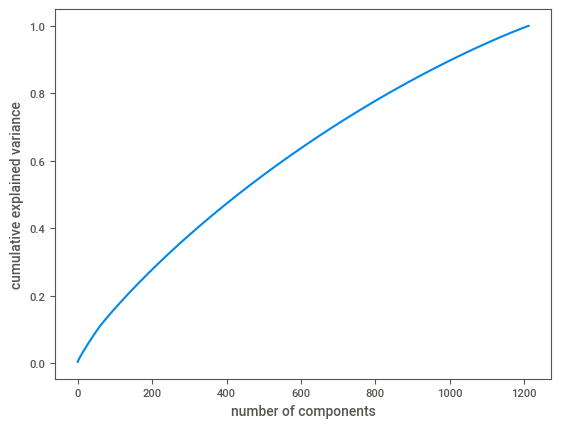

In [31]:
pca = PCA().fit(train_conn_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

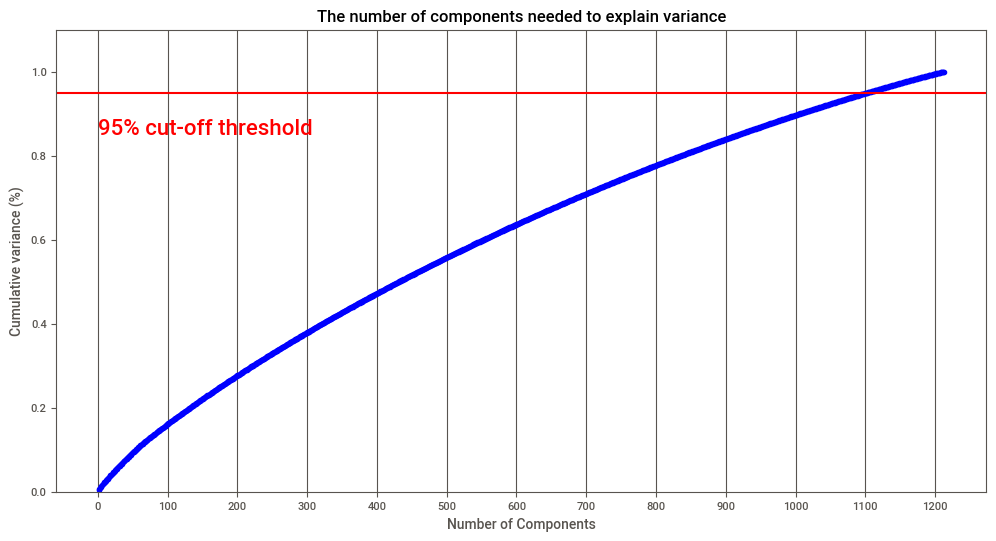

In [32]:
pca = PCA().fit(train_conn_scaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 1214, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 1213, step=100)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [33]:
n_components = 500
pca = PCA(n_components=n_components)
train_conn_pca = pca.fit_transform(train_conn_scaled)
test_conn_pca  = pca.transform(test_conn_scaled)


In [34]:
!pip install plotly

In [35]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "iframe"  # You can also try "notebook_connected"

In [36]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)

fig = px.scatter(train_conn_pca, x=0, y=2)
fig.show()


54.20043630705086


In [43]:
!pip install lazypredict


In [44]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import StratifiedKFold

In [45]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=77)
results = []

# Use only the ADHD_Outcome column for stratification
for train_index, test_index in skf.split(X_train, y_train['ADHD_Outcome']):
    X_train_t, X_test_t = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_t, y_test_t = y_train['ADHD_Outcome'].iloc[train_index], y_train['ADHD_Outcome'].iloc[test_index]

    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train_t, X_test_t, y_train_t, y_test_t)
    results.append(models)


 97%|█████████▋| 28/29 [00:18<00:00,  1.35it/s]

[LightGBM] [Info] Number of positive: 664, number of negative: 306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128213
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684536 -> initscore=0.774697
[LightGBM] [Info] Start training from score 0.774697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 97%|█████████▋| 28/29 [00:19<00:00,  1.42it/s]

[LightGBM] [Info] Number of positive: 665, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128215
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685567 -> initscore=0.779475
[LightGBM] [Info] Start training from score 0.779475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 97%|█████████▋| 28/29 [00:20<00:01,  1.02s/it]

[LightGBM] [Info] Number of positive: 665, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128210
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685567 -> initscore=0.779475
[LightGBM] [Info] Start training from score 0.779475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 97%|█████████▋| 28/29 [00:20<00:00,  1.25it/s]

[LightGBM] [Info] Number of positive: 665, number of negative: 306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128216
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684861 -> initscore=0.776202
[LightGBM] [Info] Start training from score 0.776202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 97%|█████████▋| 28/29 [00:18<00:00,  1.38it/s]

[LightGBM] [Info] Number of positive: 665, number of negative: 306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128213
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684861 -> initscore=0.776202
[LightGBM] [Info] Start training from score 0.776202


100%|██████████| 29/29 [00:21<00:00,  1.35it/s]


In [46]:
metrics_df = pd.concat(results)
metrics_summary = metrics_df.groupby(metrics_df.index).agg(['mean', 'std'])
metrics_summary

Accuracy      Balanced Accuracy      ROC AUC  \
                                  mean  std              mean  std    mean   
Model                                                                        
AdaBoostClassifier                0.76 0.03              0.71 0.04    0.71   
BaggingClassifier                 0.78 0.03              0.73 0.03    0.73   
BernoulliNB                       0.72 0.04              0.71 0.05    0.71   
CalibratedClassifierCV            0.71 0.01              0.55 0.02    0.55   
DecisionTreeClassifier            0.72 0.02              0.67 0.03    0.67   
DummyClassifier                   0.69 0.00              0.50 0.00    0.50   
ExtraTreeClassifier               0.69 0.05              0.64 0.05    0.64   
ExtraTreesClassifier              0.78 0.01              0.69 0.02    0.69   
GaussianNB                        0.68 0.02              0.57 0.02    0.57   
KNeighborsClassifier              0.69 0.01              0.51 0.01    0.51   
LGBMClassifier                    0.80 0.02              0.74 0.02    0.74   
LinearDiscriminantAnalysis        0.69 0.04              0.66 0.03    0.66   
LinearSVC                         0.69 0.04              0.66 0.04    0.66   
LogisticRegression                0.70 0.04              0.66 0.04    0.66   
NearestCentroid                   0.73 0.03              0.72 0.03    0.72   
NuSVC                             0.76 0.02              0.67 0.01    0.67   
PassiveAggressiveClassifier       0.69 0.04              0.66 0.04    0.66   
Perceptron                        0.69 0.03              0.65 0.03    0.65   
QuadraticDiscriminantAnalysis     0.69 0.00              0.50 0.00    0.50   
RandomForestClassifier            0.79 0.01              0.70 0.02    0.70   
RidgeClassifier                   0.69 0.04              0.66 0.03    0.66   
RidgeClassifierCV                 0.69 0.04              0.65 0.03    0.65   
SGDClassifier                     0.72 0.03              0.65 0.04    0.65   
SVC                               0.76 0.01              0.64 0.01    0.64   
XGBClassifier                     0.79 0.01              0.73 0.01    0.73   

                                   F1 Score      Time Taken       
                               std     mean  std       mean  std  
Model                                                             
AdaBoostClassifier            0.04     0.76 0.03       3.49 0.02  
BaggingClassifier             0.03     0.78 0.03       5.28 0.90  
BernoulliNB                   0.05     0.73 0.04       0.08 0.01  
CalibratedClassifierCV        0.02     0.63 0.03       0.99 0.08  
DecisionTreeClassifier        0.03     0.72 0.02       0.74 0.11  
DummyClassifier               0.00     0.56 0.00       0.06 0.00  
ExtraTreeClassifier           0.05     0.69 0.04       0.06 0.00  
ExtraTreesClassifier          0.02     0.76 0.01       0.52 0.01  
GaussianNB                    0.02     0.65 0.02       0.07 0.00  
KNeighborsClassifier          0.01     0.57 0.01       0.09 0.03  
LGBMClassifier                0.02     0.79 0.02       2.90 0.04  
LinearDiscriminantAnalysis    0.03     0.69 0.03       0.19 0.01  
LinearSVC                     0.04     0.70 0.03       0.48 0.05  
LogisticRegression            0.04     0.70 0.04       0.09 0.00  
NearestCentroid               0.03     0.74 0.02       0.06 0.00  
NuSVC                         0.01     0.74 0.01       0.34 0.00  
PassiveAggressiveClassifier   0.04     0.70 0.04       0.17 0.01  
Perceptron                    0.03     0.69 0.03       0.09 0.01  
QuadraticDiscriminantAnalysis 0.00     0.56 0.00       0.18 0.00  
RandomForestClassifier        0.02     0.77 0.02       2.06 0.05  
RidgeClassifier               0.03     0.70 0.03       0.08 0.00  
RidgeClassifierCV             0.03     0.69 0.03       0.18 0.00  
SGDClassifier                 0.04     0.71 0.03       0.09 0.00  
SVC                           0.01     0.72 0.01       0.31 0.01  
XGBClassifier                 0.01  

In [47]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=77)
results = []

# Use only the SEX_outcome column for stratification
for train_index, test_index in skf.split(X_train, y_train['Sex_F']):
    X_train_t, X_test_t = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_t, y_test_t = y_train['Sex_F'].iloc[train_index], y_train['Sex_F'].iloc[test_index]

    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train_t, X_test_t, y_train_t, y_test_t)
    results.append(models)
metrics_df = pd.concat(results)
metrics_summary = metrics_df.groupby(metrics_df.index).agg(['mean', 'std'])
metrics_summary

 97%|█████████▋| 28/29 [00:19<00:00,  1.04it/s]

[LightGBM] [Info] Number of positive: 332, number of negative: 638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128212
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342268 -> initscore=-0.653203
[LightGBM] [Info] Start training from score -0.653203


 97%|█████████▋| 28/29 [00:18<00:00,  1.25it/s]

[LightGBM] [Info] Number of positive: 333, number of negative: 637
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128211
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343299 -> initscore=-0.648627
[LightGBM] [Info] Start training from score -0.648627


 97%|█████████▋| 28/29 [00:18<00:00,  1.28it/s]

[LightGBM] [Info] Number of positive: 333, number of negative: 637
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128212
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343299 -> initscore=-0.648627
[LightGBM] [Info] Start training from score -0.648627


 97%|█████████▋| 28/29 [00:18<00:01,  1.00s/it]

[LightGBM] [Info] Number of positive: 333, number of negative: 638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128213
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342945 -> initscore=-0.650196
[LightGBM] [Info] Start training from score -0.650196


 97%|█████████▋| 28/29 [00:17<00:00,  1.23it/s]

[LightGBM] [Info] Number of positive: 333, number of negative: 638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128215
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342945 -> initscore=-0.650196
[LightGBM] [Info] Start training from score -0.650196


100%|██████████| 29/29 [00:20<00:00,  1.41it/s]


Accuracy      Balanced Accuracy      ROC AUC  \
                                  mean  std              mean  std    mean   
Model                                                                        
AdaBoostClassifier                0.62 0.03              0.55 0.04    0.55   
BaggingClassifier                 0.64 0.03              0.53 0.03    0.53   
BernoulliNB                       0.67 0.03              0.61 0.04    0.61   
CalibratedClassifierCV            0.69 0.01              0.56 0.01    0.56   
DecisionTreeClassifier            0.58 0.03              0.53 0.02    0.53   
DummyClassifier                   0.66 0.00              0.50 0.00    0.50   
ExtraTreeClassifier               0.55 0.03              0.50 0.04    0.50   
ExtraTreesClassifier              0.66 0.01              0.50 0.01    0.50   
GaussianNB                        0.45 0.09              0.55 0.04    0.55   
KNeighborsClassifier              0.52 0.06              0.51 0.02    0.51   
LGBMClassifier                    0.69 0.02              0.57 0.03    0.57   
LinearDiscriminantAnalysis        0.69 0.03              0.66 0.03    0.66   
LinearSVC                         0.68 0.02              0.64 0.03    0.64   
LogisticRegression                0.68 0.01              0.64 0.02    0.64   
NearestCentroid                   0.69 0.02              0.66 0.02    0.66   
NuSVC                             0.71 0.01              0.62 0.02    0.62   
PassiveAggressiveClassifier       0.67 0.02              0.64 0.02    0.64   
Perceptron                        0.67 0.02              0.64 0.02    0.64   
QuadraticDiscriminantAnalysis     0.66 0.00              0.50 0.00    0.50   
RandomForestClassifier            0.66 0.01              0.51 0.02    0.51   
RidgeClassifier                   0.69 0.03              0.66 0.03    0.66   
RidgeClassifierCV                 0.69 0.02              0.66 0.02    0.66   
SGDClassifier                     0.70 0.01              0.65 0.02    0.65   
SVC                               0.67 0.01              0.52 0.01    0.52   
XGBClassifier                     0.68 0.02              0.58 0.03    0.58   

                                   F1 Score      Time Taken       
                               std     mean  std       mean  std  
Model                                                             
AdaBoostClassifier            0.04     0.60 0.04       3.51 0.02  
BaggingClassifier             0.03     0.59 0.03       3.87 0.38  
BernoulliNB                   0.04     0.66 0.04       0.08 0.00  
CalibratedClassifierCV        0.01     0.62 0.02       1.22 0.08  
DecisionTreeClassifier        0.02     0.57 0.03       0.62 0.05  
DummyClassifier               0.00     0.52 0.00       0.06 0.00  
ExtraTreeClassifier           0.04     0.55 0.04       0.06 0.00  
ExtraTreesClassifier          0.01     0.53 0.01       0.54 0.01  
GaussianNB                    0.04     0.39 0.14       0.07 0.00  
KNeighborsClassifier          0.02     0.52 0.06       0.08 0.00  
LGBMClassifier                0.03     0.63 0.03       2.87 0.03  
LinearDiscriminantAnalysis    0.03     0.69 0.03       0.19 0.00  
LinearSVC                     0.03     0.68 0.02       0.60 0.15  
LogisticRegression            0.02     0.68 0.01       0.09 0.00  
NearestCentroid               0.02     0.69 0.02       0.06 0.00  
NuSVC                         0.02     0.68 0.01       0.37 0.01  
PassiveAggressiveClassifier   0.02     0.67 0.02       0.16 0.01  
Perceptron                    0.02     0.68 0.02       0.09 0.01  
QuadraticDiscriminantAnalysis 0.00     0.52 0.00       0.18 0.00  
RandomForestClassifier        0.02     0.54 0.02       1.89 0.05  
RidgeClassifier               0.03     0.69 0.03       0.08 0.01  
RidgeClassifierCV             0.02     0.69 0.02       0.20 0.04  
SGDClassifier                 0.02     0.69 0.01       0.09 0.01  
SVC                           0.01     0.55 0.02       0.37 0.02  
XGBClassifier                 0.03  

## Without KFOLDs

In [48]:

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train['ADHD_Outcome'], test_size=0.2, random_state=42
)

In [49]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)


In [50]:
models, predictions = clf.fit(X_train_split, X_test_split, y_train_split, y_test_split)


print("Model performance on ADHD_Outcome:")
models


 97%|█████████▋| 28/29 [00:18<00:00,  1.27it/s]

[LightGBM] [Info] Number of positive: 653, number of negative: 317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128215
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.673196 -> initscore=0.722675
[LightGBM] [Info] Start training from score 0.722675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:21<00:00,  1.38it/s]

Model performance on ADHD_Outcome:


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.77,0.76,0.76,0.78,0.06
BernoulliNB,0.76,0.74,0.74,0.77,0.08
XGBClassifier,0.79,0.72,0.72,0.79,2.88
BaggingClassifier,0.77,0.69,0.69,0.76,4.44
LGBMClassifier,0.79,0.69,0.69,0.78,2.97
ExtraTreeClassifier,0.72,0.68,0.68,0.73,0.06
ExtraTreesClassifier,0.80,0.67,0.67,0.77,0.51
RandomForestClassifier,0.78,0.67,0.67,0.77,1.99
AdaBoostClassifier,0.75,0.66,0.66,0.74,3.47


In [51]:
predictions.to_csv('lazy_predict_adhd_predictions.csv', index=False)

In [52]:
X_train_split2, X_test_split2, y_train_split2, y_test_split2 = train_test_split(
    X_train, y_train['Sex_F'], test_size=0.2, random_state=42
)

clf2 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models2, predictions2 = clf2.fit(X_train_split2, X_test_split2, y_train_split2, y_test_split2)
print("Model performance on Sex_F:")
print(models2)

 97%|█████████▋| 28/29 [00:19<00:01,  1.03s/it]

[LightGBM] [Info] Number of positive: 344, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128215
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354639 -> initscore=-0.598709
[LightGBM] [Info] Start training from score -0.598709


100%|██████████| 29/29 [00:21<00:00,  1.32it/s]

Model performance on Sex_F:
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifier                    0.72               0.68     0.68      0.72   
LogisticRegression                 0.72               0.68     0.68      0.73   
LinearDiscriminantAnalysis         0.72               0.68     0.68      0.72   
RidgeClassifierCV                  0.72               0.67     0.67      0.72   
SGDClassifier                      0.73               0.67     0.67      0.73   
Perceptron                         0.72               0.67     0.67      0.72   
PassiveAggressiveClassifier        0.70               0.67     0.67      0.71   
LinearSVC                          0.68               0.65     0.65      0.69   
NearestCentroid                    0.67               0.62     0.62      0.67   
NuSVC                              0.73               0.61     0.61      0.70   


From the LazyPredict, we can try the following models independently.

For PCA components of 80, we have the following: 
1. ADHD + KFOLD:
- LinearDiscriminantAnalysis (ROC AUC: 0.74, F1: 0.79)
- XGBClassifier (ROC AUC: 0.74, F1: 0.79)
- RidgeClassifierCV (ROC AUC: 0.73, F1: 0.79)
- LGBMClassifier (ROC AUC: 0.73, F1: 0.78)
- RandomForestClassifier (ROC AUC: 0.73, F1: 0.78)

2. SEX_F + KFOLD
For the SEX_F data (with k-fold), the absolute numbers are lower. The highest performers (by F1/ROC AUC) include:
- LinearSVC (ROC AUC: 0.66, F1: 0.70)
- LogisticRegression (ROC AUC: 0.65, F1: 0.70)
- NuSVC (ROC AUC: 0.64, F1: 0.69)
- LinearDiscriminantAnalysis (ROC AUC: 0.63, F1: 0.68)
- RidgeClassifier (ROC AUC: 0.62, F1: 0.67)


3. ADHD w/o KFOLD
When not using cross‑validation, many models perform very similarly. Still, a set of five top performers (by highest F1 combined with good ROC AUC) might be:

- LinearSVC (ROC AUC: 0.73, F1: 0.80)
- NuSVC (ROC AUC: 0.72, F1: 0.80)
- NearestCentroid (ROC AUC: 0.76, F1: 0.76)
- XGBClassifier (ROC AUC: 0.72, F1: 0.79)
- RandomForestClassifier (ROC AUC: 0.72, F1: 0.79)
Here LinearSVC and NuSVC lead with F1 scores of 0.80, while several others (including XGB and RF) are nearly as good.


4. SEX_F w/o KFOLD
For SEX_F without k-fold, the overall numbers are again a bit lower. The best five might be:

- RidgeClassifierCV (ROC AUC: 0.66, F1: 0.74)
- RidgeClassifier (ROC AUC: 0.66, F1: 0.73)
- LinearDiscriminantAnalysis (ROC AUC: 0.65, F1: 0.72)
- XGBClassifier (ROC AUC: 0.63, F1: 0.71)
- LogisticRegression (ROC AUC: 0.64, F1: 0.70)
In this group the Ridge models come out ahead, with LDA, XGB, and LogisticRegression following closely.

For different PCA

1. ADHD + Kfold
Looking at the F1 scores and ROC AUC values, the following models are leading:

- LGBMClassifier
    - F1 Score: 0.79
    - ROC AUC: 0.74
- XGBClassifier
    - F1 Score: 0.79
    - ROC AUC: 0.73
- BaggingClassifier
    - F1 Score: 0.78
    - ROC AUC: 0.73
- RandomForestClassifier
    - F1 Score: 0.77
    - ROC AUC: 0.70
- NearestCentroid
    - F1 Score: 0.74
    - ROC AUC: 0.72
Note: While several other classifiers (e.g., AdaBoostClassifier with F1 = 0.76, ROC AUC = 0.71) come close, these five models have the highest F1/ROC AUC combination.

2. SEX_F + Kfold
For the SEX_F dataset with k-fold cross-validation, the overall scores are lower. The top performers here (all with F1 scores around 0.69) include:

- LinearDiscriminantAnalysis
    - F1 Score: 0.69
    - ROC AUC: 0.66
- NearestCentroid
    - F1 Score: 0.69
    - ROC AUC: 0.66
- RidgeClassifier
    - F1 Score: 0.69
    - ROC AUC: 0.66
- RidgeClassifierCV
    - F1 Score: 0.69
    - ROC AUC: 0.66
- SGDClassifier
    - F1 Score: 0.69
    - ROC AUC: 0.65
Note: Other classifiers (like LinearSVC and LogisticRegression at F1 ≈ 0.68) are slightly behind these top performers.

3. ADHD w/o Kfold
Without cross‑validation, the numbers shift a bit. The best models based on F1 and ROC AUC appear to be:

- XGBClassifier
    - F1 Score: 0.79
    - ROC AUC: 0.72
- NearestCentroid
    - F1 Score: 0.78
    - ROC AUC: 0.76
- LGBMClassifier
    - F1 Score: 0.78
    - ROC AUC: 0.69
- BernoulliNB
    - F1 Score: 0.77
    - ROC AUC: 0.74
- RandomForestClassifier
    - F1 Score: 0.77
    - ROC AUC: 0.67
Note: Although ExtraTreesClassifier also shows F1 = 0.77, its ROC AUC (0.67) is comparable to RandomForestClassifier, so either could be chosen. In this list, RandomForestClassifier rounds out the top five.

4. SEX_F w/o Kfold
For SEX_F without k-fold, the models generally have F1 scores in the low 0.70s. The best five (with a slight edge given to those with ROC AUC near 0.68) are:

- LogisticRegression
    - F1 Score: 0.73
    - ROC AUC: 0.68
- SGDClassifier
    - F1 Score: 0.73
    - ROC AUC: 0.67
- RidgeClassifier
    - F1 Score: 0.72
    - ROC AUC: 0.68
- LinearDiscriminantAnalysis
    - F1 Score: 0.72
    - ROC AUC: 0.68
- RidgeClassifierCV
    - F1 Score: 0.72
    - ROC AUC: 0.67
Note: Perceptron is another contender (F1 = 0.72, ROC AUC = 0.67) but is very similar to RidgeClassifierCV.

In [53]:
X_train

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,pc_491,pc_492,pc_493,pc_494,pc_495,pc_496,pc_497,pc_498,pc_499,pc_500
0,40.00,13.00,3.00,10.00,47.00,13.00,11.00,28.00,0.00,6.00,...,0.21,0.24,0.33,-3.67,-0.83,-0.79,-1.70,-0.61,-2.54,-2.51
1,-94.47,14.00,3.00,13.00,34.00,18.00,23.00,30.00,0.00,18.00,...,-3.05,3.16,-0.64,4.55,-4.54,-6.54,-1.75,6.10,6.47,0.33
2,-46.67,14.00,4.00,10.00,35.00,16.00,10.00,29.00,1.00,14.00,...,-4.01,-0.13,2.70,-4.49,-6.54,4.13,-0.13,-7.26,3.18,5.22
3,-26.68,10.00,5.00,12.00,39.00,19.00,16.00,28.00,6.00,24.00,...,6.40,-2.73,4.98,-4.41,-0.27,-4.48,-5.64,-3.86,1.84,2.03
4,0.00,14.00,5.00,15.00,40.00,20.00,24.00,28.00,1.00,18.00,...,-3.19,-3.63,0.34,-0.04,-4.05,2.22,-5.62,-1.86,-4.47,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,87.80,14.00,5.00,14.00,39.00,20.00,15.00,21.00,1.00,9.00,...,0.49,4.51,-5.09,-1.70,1.14,-2.06,-0.23,0.65,-4.06,6.91
1209,77.80,14.00,3.00,10.00,32.00,20.00,11.00,23.00,6.00,18.00,...,0.08,-1.41,1.15,-4.19,-0.94,-0.52,-1.39,-0.43,1.20,1.53
1210,16.68,14.00,3.00,16.00,28.00,15.00,19.00,27.00,3.00,4.00,...,2.52,3.81,-2.11,-2.12,0.85,1.68,4.10,-1.86,2.27,2.55
1211,53.40,14.00,3.00,14.00,34.00,18.00,23.00,23.00,4.00,9.00,...,-5.96,2.51,0.65,-1.08,-2.86,-2.74,-2.38,0.58,6.00,1.07


In [54]:
y_train

,ADHD_Outcome,Sex_F
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1
...,...,...
1208,0,0
1209,0,1
1210,0,1
1211,0,0


In [55]:
X_test

,Basic_Demos_Enroll_Year_x,Basic_Demos_Study_Site_x,PreInt_Demos_Fam_Child_Ethnicity_x,PreInt_Demos_Fam_Child_Race_x,MRI_Track_Scan_Location_x,Barratt_Barratt_P1_Edu_x,Barratt_Barratt_P1_Occ_x,Barratt_Barratt_P2_Edu_x,Barratt_Barratt_P2_Occ_x,EHQ_EHQ_Total,...,pc_491,pc_492,pc_493,pc_494,pc_495,pc_496,pc_497,pc_498,pc_499,pc_500
0,2022,4,0.00,0.00,4,21.00,30.00,18.00,30.00,60.03,...,2.72,-4.41,-1.38,-9.93,-11.28,-0.53,-5.56,-6.11,-3.46,-3.18
1,2023,4,0.00,0.00,4,21.00,45.00,NaN,30.00,86.71,...,4.55,-2.12,2.10,-4.82,1.41,-9.20,5.92,-10.07,1.04,-4.84
2,2022,4,0.00,0.00,4,21.00,40.00,18.00,40.00,26.68,...,12.55,-5.50,1.74,4.90,-5.00,-2.03,1.44,8.71,3.32,-2.07
3,2022,4,0.00,0.00,3,21.00,45.00,21.00,45.00,93.38,...,6.46,-6.19,-5.25,4.82,-3.94,-6.45,-4.88,7.53,5.00,-4.56
4,2022,4,2.00,0.00,4,18.00,0.00,21.00,45.00,-93.38,...,1.40,-1.23,2.07,5.91,-0.18,-0.13,-4.12,1.49,2.53,-8.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2023,4,0.00,0.00,4,18.00,0.00,18.00,35.00,86.71,...,1.14,-7.70,5.91,-1.72,-2.22,-5.81,-5.96,3.62,7.84,-6.37
300,2023,4,0.00,1.00,3,18.00,35.00,21.00,40.00,73.37,...,-6.65,-6.98,-2.96,-3.64,0.93,-5.36,-9.96,0.02,5.73,-8.26
301,2023,4,0.00,8.00,4,21.00,25.00,15.00,NaN,87.84,...,1.56,-12.41,-0.58,1.31,-1.14,-2.32,-9.51,0.14,3.44,1.13
302,2022,4,0.00,8.00,4,21.00,0.00,21.00,45.00,46.76,...,4.52,-4.57,3.50,-4.26,-3.59,-5.86,-2.40,0.22,9.59,1.99


### MULTI-OUTPUT CLASSIFICATION

In [56]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [66]:
features = X_train.columns

In [67]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

model = MultiOutputClassifier(
    make_pipeline(
        ColumnTransformer(
            transformers=[
                ('imputer', SimpleImputer(strategy='mean'), features)
            ],
            remainder='passthrough'
        ),
        StandardScaler(),
        XGBClassifier(
            n_estimators=500,         # More trees
            learning_rate=0.03,       # Lower learning rate
            max_depth=8,              # Deeper trees
            colsample_bytree=0.8,     # Random feature selection (column sampling)
            subsample=0.8,            # Better generalization (row subsampling)
            gamma=1,                  # Minimum loss reduction required for further partitioning
            reg_lambda=10,            # L2 regularization
            reg_alpha=1,              # L1 regularization
            random_state=42
        )
    )
)


In [64]:
X_train

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,pc_491,pc_492,pc_493,pc_494,pc_495,pc_496,pc_497,pc_498,pc_499,pc_500
0,40.00,13.00,3.00,10.00,47.00,13.00,11.00,28.00,0.00,6.00,...,0.21,0.24,0.33,-3.67,-0.83,-0.79,-1.70,-0.61,-2.54,-2.51
1,-94.47,14.00,3.00,13.00,34.00,18.00,23.00,30.00,0.00,18.00,...,-3.05,3.16,-0.64,4.55,-4.54,-6.54,-1.75,6.10,6.47,0.33
2,-46.67,14.00,4.00,10.00,35.00,16.00,10.00,29.00,1.00,14.00,...,-4.01,-0.13,2.70,-4.49,-6.54,4.13,-0.13,-7.26,3.18,5.22
3,-26.68,10.00,5.00,12.00,39.00,19.00,16.00,28.00,6.00,24.00,...,6.40,-2.73,4.98,-4.41,-0.27,-4.48,-5.64,-3.86,1.84,2.03
4,0.00,14.00,5.00,15.00,40.00,20.00,24.00,28.00,1.00,18.00,...,-3.19,-3.63,0.34,-0.04,-4.05,2.22,-5.62,-1.86,-4.47,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,87.80,14.00,5.00,14.00,39.00,20.00,15.00,21.00,1.00,9.00,...,0.49,4.51,-5.09,-1.70,1.14,-2.06,-0.23,0.65,-4.06,6.91
1209,77.80,14.00,3.00,10.00,32.00,20.00,11.00,23.00,6.00,18.00,...,0.08,-1.41,1.15,-4.19,-0.94,-0.52,-1.39,-0.43,1.20,1.53
1210,16.68,14.00,3.00,16.00,28.00,15.00,19.00,27.00,3.00,4.00,...,2.52,3.81,-2.11,-2.12,0.85,1.68,4.10,-1.86,2.27,2.55
1211,53.40,14.00,3.00,14.00,34.00,18.00,23.00,23.00,4.00,9.00,...,-5.96,2.51,0.65,-1.08,-2.86,-2.74,-2.38,0.58,6.00,1.07


In [65]:
print(X_train.columns.tolist())


['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9', 'pc_10', 'pc_11', 'pc_12', 'pc_13', 'pc_14', 'pc_15', 'pc_16', 'pc_17', 'pc_18', 'pc_19', 'pc_20', 'pc_21', 'pc_22', 'pc_23', 'pc_24', 'pc_25', 'pc_26', 'pc_27', 'pc_28', 'pc_29', 'pc_30', 'pc_31', 'pc_32', 'pc_33', 'pc_34', 'pc_35', 'pc_36', 'pc_37', 'pc_38', '

In [68]:
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('imputer',
                                                                                  SimpleImputer(),
                                                                                  Index(['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP',
       'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
       'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties...
                                                               gamma=1,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=0.03,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=8,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=500,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...))]))

In [70]:
X_test

,Basic_Demos_Enroll_Year_x,Basic_Demos_Study_Site_x,PreInt_Demos_Fam_Child_Ethnicity_x,PreInt_Demos_Fam_Child_Race_x,MRI_Track_Scan_Location_x,Barratt_Barratt_P1_Edu_x,Barratt_Barratt_P1_Occ_x,Barratt_Barratt_P2_Edu_x,Barratt_Barratt_P2_Occ_x,EHQ_EHQ_Total,...,pc_491,pc_492,pc_493,pc_494,pc_495,pc_496,pc_497,pc_498,pc_499,pc_500
0,2022,4,0.00,0.00,4,21.00,30.00,18.00,30.00,60.03,...,2.72,-4.41,-1.38,-9.93,-11.28,-0.53,-5.56,-6.11,-3.46,-3.18
1,2023,4,0.00,0.00,4,21.00,45.00,NaN,30.00,86.71,...,4.55,-2.12,2.10,-4.82,1.41,-9.20,5.92,-10.07,1.04,-4.84
2,2022,4,0.00,0.00,4,21.00,40.00,18.00,40.00,26.68,...,12.55,-5.50,1.74,4.90,-5.00,-2.03,1.44,8.71,3.32,-2.07
3,2022,4,0.00,0.00,3,21.00,45.00,21.00,45.00,93.38,...,6.46,-6.19,-5.25,4.82,-3.94,-6.45,-4.88,7.53,5.00,-4.56
4,2022,4,2.00,0.00,4,18.00,0.00,21.00,45.00,-93.38,...,1.40,-1.23,2.07,5.91,-0.18,-0.13,-4.12,1.49,2.53,-8.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2023,4,0.00,0.00,4,18.00,0.00,18.00,35.00,86.71,...,1.14,-7.70,5.91,-1.72,-2.22,-5.81,-5.96,3.62,7.84,-6.37
300,2023,4,0.00,1.00,3,18.00,35.00,21.00,40.00,73.37,...,-6.65,-6.98,-2.96,-3.64,0.93,-5.36,-9.96,0.02,5.73,-8.26
301,2023,4,0.00,8.00,4,21.00,25.00,15.00,NaN,87.84,...,1.56,-12.41,-0.58,1.31,-1.14,-2.32,-9.51,0.14,3.44,1.13
302,2022,4,0.00,8.00,4,21.00,0.00,21.00,45.00,46.76,...,4.52,-4.57,3.50,-4.26,-3.59,-5.86,-2.40,0.22,9.59,1.99


In [71]:
X_train

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,pc_491,pc_492,pc_493,pc_494,pc_495,pc_496,pc_497,pc_498,pc_499,pc_500
0,40.00,13.00,3.00,10.00,47.00,13.00,11.00,28.00,0.00,6.00,...,0.21,0.24,0.33,-3.67,-0.83,-0.79,-1.70,-0.61,-2.54,-2.51
1,-94.47,14.00,3.00,13.00,34.00,18.00,23.00,30.00,0.00,18.00,...,-3.05,3.16,-0.64,4.55,-4.54,-6.54,-1.75,6.10,6.47,0.33
2,-46.67,14.00,4.00,10.00,35.00,16.00,10.00,29.00,1.00,14.00,...,-4.01,-0.13,2.70,-4.49,-6.54,4.13,-0.13,-7.26,3.18,5.22
3,-26.68,10.00,5.00,12.00,39.00,19.00,16.00,28.00,6.00,24.00,...,6.40,-2.73,4.98,-4.41,-0.27,-4.48,-5.64,-3.86,1.84,2.03
4,0.00,14.00,5.00,15.00,40.00,20.00,24.00,28.00,1.00,18.00,...,-3.19,-3.63,0.34,-0.04,-4.05,2.22,-5.62,-1.86,-4.47,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,87.80,14.00,5.00,14.00,39.00,20.00,15.00,21.00,1.00,9.00,...,0.49,4.51,-5.09,-1.70,1.14,-2.06,-0.23,0.65,-4.06,6.91
1209,77.80,14.00,3.00,10.00,32.00,20.00,11.00,23.00,6.00,18.00,...,0.08,-1.41,1.15,-4.19,-0.94,-0.52,-1.39,-0.43,1.20,1.53
1210,16.68,14.00,3.00,16.00,28.00,15.00,19.00,27.00,3.00,4.00,...,2.52,3.81,-2.11,-2.12,0.85,1.68,4.10,-1.86,2.27,2.55
1211,53.40,14.00,3.00,14.00,34.00,18.00,23.00,23.00,4.00,9.00,...,-5.96,2.51,0.65,-1.08,-2.86,-2.74,-2.38,0.58,6.00,1.07


In [76]:
# First, let's ensure both train and test have the same columns
def align_datasets(train_df, test_df):
    # Get all columns from both datasets
    all_columns = set(train_df.columns) | set(test_df.columns)
    
    # Add missing columns to each dataset with zeros
    for col in all_columns:
        if col not in train_df.columns:
            train_df[col] = 0
        if col not in test_df.columns:
            test_df[col] = 0
    
    # Ensure both datasets have the same column order
    train_df = train_df[sorted(all_columns)]
    test_df = test_df[sorted(all_columns)]
    
    return train_df, test_df

# Align the datasets
X_train_aligned, X_test_aligned = align_datasets(X_train, X_test)

# Verify the columns match
assert all(X_train_aligned.columns == X_test_aligned.columns), "Columns still don't match!"

# Now use these aligned datasets with your model
model.fit(X_train_aligned, y_train)
pred = model.predict(X_test_aligned)

In [77]:
# print(X_train.columns.tolist()), print(X_test.columns.tolist())

In [79]:
# You can convert predictions to a DataFrame for better visualization
predictions_df = pd.DataFrame(
    pred, 
    columns=['ADHD_Outcome', 'Sex_F'],
    index=X_test_aligned.index
)

# Add participant_id if needed
predictions_df['participant_id'] = final_test['participant_id']

# You can also get probability predictions
pred_proba = model.predict_proba(X_test_aligned)

# pred_proba will be a list of two elements:
# pred_proba[0] = probabilities for ADHD_Outcome
# pred_proba[1] = probabilities for Sex_F

# Create probability DataFrames
adhd_probs = pd.DataFrame(
    pred_proba[0], 
    columns=['ADHD_prob_0', 'ADHD_prob_1'],
    index=X_test_aligned.index
)

sex_probs = pd.DataFrame(
    pred_proba[1], 
    columns=['Sex_prob_0', 'Sex_prob_1'],
    index=X_test_aligned.index
)

# Combine all predictions
final_predictions = pd.concat([
    predictions_df,
    adhd_probs,
    sex_probs
], axis=1)

# Save predictions
final_predictions.to_csv('multi_output_predictions.csv', index=False)

In [81]:
final_predictions

,ADHD_Outcome,Sex_F,participant_id,ADHD_prob_0,ADHD_prob_1,Sex_prob_0,Sex_prob_1
0,1,0,Cfwaf5FX7jWK,0.25,0.75,0.74,0.26
1,1,0,vhGrzmvA3Hjq,0.29,0.71,0.57,0.43
2,1,0,ULliyEXjy4OV,0.36,0.64,0.55,0.45
3,1,0,LZfeAb1xMtql,0.22,0.78,0.69,0.31
4,1,0,EnFOUv0YK1RG,0.10,0.90,0.69,0.31
...,...,...,...,...,...,...,...
299,1,1,UadZfjdEg7eG,0.30,0.70,0.48,0.52
300,1,0,IUEHiLmQAqCi,0.20,0.80,0.78,0.22
301,1,0,cRySmCadYFRO,0.43,0.57,0.56,0.44
302,1,0,E3MvDUtJadc5,0.26,0.74,0.61,0.39


In [82]:
# First, let's do the train-test split correctly
X_train_multi, X_val_multi, y_train_multi, y_val_multi = train_test_split(
    X_train, 
    y_train, 
    test_size=0.2, 
    random_state=42,
    stratify=y_train['ADHD_Outcome']  # Stratify by ADHD outcome
)

# Align training and validation sets
X_train_aligned, X_val_aligned = align_datasets(X_train_multi, X_val_multi)

# Train the model
model.fit(X_train_aligned, y_train_multi)

# Make predictions on validation set
val_pred = model.predict(X_val_aligned)
val_pred_proba = model.predict_proba(X_val_aligned)

# Split predictions by target
adhd_preds = val_pred[:, 0]
sex_preds = val_pred[:, 1]

# Evaluate performance
print("ADHD Prediction Performance:")
print(classification_report(y_val_multi['ADHD_Outcome'], adhd_preds))
print("\nADHD ROC-AUC:", roc_auc_score(y_val_multi['ADHD_Outcome'], adhd_preds))

print("\nSex Prediction Performance:")
print(classification_report(y_val_multi['Sex_F'], sex_preds))
print("\nSex ROC-AUC:", roc_auc_score(y_val_multi['Sex_F'], sex_preds))

# For final predictions on test set
X_train_aligned_final, X_test_aligned_final = align_datasets(X_train, X_test)
model_final = MultiOutputClassifier(
    XGBClassifier(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=8,
        colsample_bytree=0.8,
        subsample=0.8,
        gamma=1,
        reg_lambda=10,
        reg_alpha=1,
        random_state=42
    )
)
model_final.fit(X_train_aligned_final, y_train)
test_pred = model_final.predict(X_test_aligned_final)
test_pred_proba = model_final.predict_proba(X_test_aligned_final)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'participant_id': final_test['participant_id'],
    'ADHD_Outcome': test_pred[:, 0],
    'Sex_F': test_pred[:, 1]
})

# Save predictions
submission_df.to_csv('multi_output_predictions.csv', index=False)

ADHD Prediction Performance:
              precision    recall  f1-score   support

           0       0.76      0.53      0.63        77
           1       0.81      0.92      0.86       166

    accuracy                           0.80       243
   macro avg       0.78      0.73      0.74       243
weighted avg       0.79      0.80      0.79       243


ADHD ROC-AUC: 0.7270771397277421

Sex Prediction Performance:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       158
           1       0.62      0.12      0.20        85

    accuracy                           0.67       243
   macro avg       0.65      0.54      0.49       243
weighted avg       0.65      0.67      0.58       243


Sex ROC-AUC: 0.5398361876396128


In [83]:
submission_df

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0
...,...,...,...
299,UadZfjdEg7eG,1,1
300,IUEHiLmQAqCi,1,0
301,cRySmCadYFRO,1,0
302,E3MvDUtJadc5,1,0


In [84]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, roc_auc_score

# Separate models for ADHD and Sex prediction
def train_balanced_model(X_train, y_train, X_test, target_name='ADHD_Outcome'):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply SMOTE for balance
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(
        X_train_scaled, y_train[target_name]
    )
    
    # Initialize model with class weights
    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=8,
        colsample_bytree=0.8,
        subsample=0.8,
        gamma=1,
        reg_lambda=10,
        reg_alpha=1,
        scale_pos_weight=1,  # Will be balanced by SMOTE
        random_state=42
    )
    
    # Calibrate probabilities
    calibrated_model = CalibratedClassifierCV(
        model, 
        cv=5, 
        method='sigmoid'
    )
    
    # Train model
    calibrated_model.fit(X_train_balanced, y_train_balanced)
    
    # Get predictions
    y_pred = calibrated_model.predict(X_test_scaled)
    y_pred_proba = calibrated_model.predict_proba(X_test_scaled)
    
    return y_pred, y_pred_proba

# Train separate models
adhd_pred, adhd_proba = train_balanced_model(X_train, y_train, X_test, 'ADHD_Outcome')
sex_pred, sex_proba = train_balanced_model(X_train, y_train, X_test, 'Sex_F')

# Create submission DataFrame
submission_df = pd.DataFrame({
    'participant_id': X_test.index,
    'ADHD_Outcome': adhd_pred,
    'Sex_F': sex_pred
})

# Add probability thresholding for better balance
adhd_ratio = y_train['ADHD_Outcome'].mean()
sex_ratio = y_train['Sex_F'].mean()

# Adjust predictions based on desired class ratios
submission_df['ADHD_Outcome'] = (adhd_proba[:, 1] > np.percentile(adhd_proba[:, 1], (1-adhd_ratio)*100)).astype(int)
submission_df['Sex_F'] = (sex_proba[:, 1] > np.percentile(sex_proba[:, 1], (1-sex_ratio)*100)).astype(int)

# Save predictions
submission_df.to_csv('balanced_predictions.csv', index=False)

# Print class distributions
print("ADHD Distribution:", submission_df['ADHD_Outcome'].value_counts(normalize=True))
print("Sex Distribution:", submission_df['Sex_F'].value_counts(normalize=True))

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [85]:
# Check our data structure
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

# Check column names
print("\nX_train columns:", X_train.columns.tolist())
print("\ny_train columns:", y_train.columns.tolist())
print("\nX_test columns:", X_test.columns.tolist())

# Check for any missing values
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())

# Check target distributions
print("\nADHD_Outcome distribution in training:")
print(y_train['ADHD_Outcome'].value_counts(normalize=True))
print("\nSex_F distribution in training:")
print(y_train['Sex_F'].value_counts(normalize=True))

X_train shape: (1213, 545)
y_train shape: (1213, 2)
X_test shape: (304, 545)

X_train columns: ['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9', 'pc_10', 'pc_11', 'pc_12', 'pc_13', 'pc_14', 'pc_15', 'pc_16', 'pc_17', 'pc_18', 'pc_19', 'pc_20', 'pc_21', 'pc_22', 'pc_23', 'pc_24', 'pc_25', 'pc_26', 'pc_27', 'pc_2

In [87]:
def preprocess_data(X_train, X_test, y_train):
    # 1. Handle missing values first
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())
    
    # 2. Keep only pc_ columns (which are unique) and one copy of the demographic columns
    pc_cols = [col for col in X_train.columns if col.startswith('pc_')]
    demo_cols = [
        'EHQ_EHQ_Total', 
        'ColorVision_CV_Score',
        'APQ_P_APQ_P_CP',
        'APQ_P_APQ_P_ID',
        'APQ_P_APQ_P_INV',
        'APQ_P_APQ_P_OPD',
        'APQ_P_APQ_P_PM',
        'APQ_P_APQ_P_PP',
        'SDQ_SDQ_Conduct_Problems',
        'SDQ_SDQ_Difficulties_Total',
        'SDQ_SDQ_Emotional_Problems',
        'SDQ_SDQ_Externalizing',
        'SDQ_SDQ_Generating_Impact',
        'SDQ_SDQ_Hyperactivity',
        'SDQ_SDQ_Internalizing',
        'SDQ_SDQ_Peer_Problems',
        'SDQ_SDQ_Prosocial',
        'MRI_Track_Age_at_Scan'
    ]
    
    # Keep demographic columns with _x suffix (first copy)
    demo_cols_x = [col for col in X_train.columns if col.endswith('_x') and col.replace('_x', '') not in demo_cols]
    
    # Combine all columns we want to keep
    keep_cols = pc_cols + demo_cols + demo_cols_x
    
    # Select columns and rename _x columns
    X_train = X_train[keep_cols].copy()
    X_test = X_test[keep_cols].copy()
    
    # Remove _x suffix
    rename_dict = {col: col.replace('_x', '') for col in demo_cols_x}
    X_train = X_train.rename(columns=rename_dict)
    X_test = X_test.rename(columns=rename_dict)
    
    print(f"Shape after preprocessing - X_train: {X_train.shape}, X_test: {X_test.shape}")
    
    return X_train, X_test

def train_models(X_train, X_test, y_train):
    # Train separate models for ADHD and Sex prediction
    models = {}
    predictions = {}
    
    for target in ['ADHD_Outcome', 'Sex_F']:
        # Initialize model
        model = XGBClassifier(
            n_estimators=500,
            learning_rate=0.03,
            max_depth=8,
            colsample_bytree=0.8,
            subsample=0.8,
            gamma=1,
            reg_lambda=10,
            reg_alpha=1,
            scale_pos_weight=1/y_train[target].mean(),  # Handle class imbalance
            random_state=42
        )
        
        # Train model
        model.fit(
            X_train, 
            y_train[target],
            eval_metric='auc',
            verbose=False
        )
        
        # Store model
        models[target] = model
        
        # Make predictions
        predictions[target] = model.predict(X_test)
    
    return predictions

# Preprocess the data
X_train_prep, X_test_prep = preprocess_data(X_train, X_test, y_train)

# Train models and get predictions
predictions = train_models(X_train_prep, X_test_prep, y_train)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'participant_id': X_test.index,
    'ADHD_Outcome': predictions['ADHD_Outcome'],
    'Sex_F': predictions['Sex_F']
})

# Print class distributions in predictions
print("\nPredicted distributions:")
print("ADHD Distribution:", pd.Series(predictions['ADHD_Outcome']).value_counts(normalize=True))
print("Sex Distribution:", pd.Series(predictions['Sex_F']).value_counts(normalize=True))

# Save predictions
submission_df.to_csv('multi_output_predictions.csv', index=False)

Shape after preprocessing - X_train: (1213, 527), X_test: (304, 527)

Predicted distributions:
ADHD Distribution: 1   0.87
0   0.13
Name: proportion, dtype: float64
Sex Distribution: 1   0.53
0   0.47
Name: proportion, dtype: float64


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_prep, 
    y_train, 
    test_size=0.2, 
    random_state=42,
    stratify=y_train['ADHD_Outcome']
)

# Train and evaluate models
for target in ['ADHD_Outcome', 'Sex_F']:
    print(f"\n{target} Classification Report:")
    
    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=8,
        colsample_bytree=0.8,
        subsample=0.8,
        gamma=1,
        reg_lambda=10,
        reg_alpha=1,
        scale_pos_weight=1/y_train[target].mean(),
        random_state=42
    )
    
    # Train on split training data
    model.fit(
        X_train_split, 
        y_train_split[target],
        eval_metric='auc',
        verbose=False
    )
    
    # Predict on validation set
    val_pred = model.predict(X_val_split)
    
    # Print classification report
    print(classification_report(y_val_split[target], val_pred))



ADHD_Outcome Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.52      0.62        77
           1       0.81      0.93      0.86       166

    accuracy                           0.80       243
   macro avg       0.79      0.72      0.74       243
weighted avg       0.79      0.80      0.79       243


Sex_F Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       158
           1       0.51      0.34      0.41        85

    accuracy                           0.65       243
   macro avg       0.60      0.58      0.58       243
weighted avg       0.63      0.65      0.63       243



In [89]:
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV

def train_improved_model(X_train, X_val, y_train, y_val, target):
    # Apply SMOTE to balance classes
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train[target])
    
    # Initialize base model
    base_model = XGBClassifier(
        n_estimators=1000,  # Increased from 500
        learning_rate=0.01,  # Decreased from 0.03
        max_depth=6,        # Decreased from 8
        colsample_bytree=0.8,
        subsample=0.8,
        gamma=1,
        reg_lambda=15,      # Increased regularization
        reg_alpha=2,
        random_state=42
    )
    
    # Add probability calibration
    model = CalibratedClassifierCV(
        base_model,
        cv=5,
        method='sigmoid'
    )
    
    # Train model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Get predictions
    val_pred = model.predict(X_val)
    val_proba = model.predict_proba(X_val)
    
    # Print classification report
    print(f"\n{target} Classification Report:")
    print(classification_report(y_val[target], val_pred))
    
    return model, val_proba

# Train improved models
adhd_model, adhd_proba = train_improved_model(
    X_train_split, X_val_split, y_train_split, y_val_split, 'ADHD_Outcome'
)

sex_model, sex_proba = train_improved_model(
    X_train_split, X_val_split, y_train_split, y_val_split, 'Sex_F'
)

# Function to find optimal threshold
def find_optimal_threshold(y_true, y_proba):
    thresholds = np.arange(0.3, 0.7, 0.01)
    best_f1 = 0
    best_threshold = 0.5
    
    for threshold in thresholds:
        y_pred = (y_proba[:, 1] > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    return best_threshold

# Find optimal thresholds
adhd_threshold = find_optimal_threshold(y_val_split['ADHD_Outcome'], adhd_proba)
sex_threshold = find_optimal_threshold(y_val_split['Sex_F'], sex_proba)

print(f"\nOptimal thresholds - ADHD: {adhd_threshold:.3f}, Sex: {sex_threshold:.3f}")

# Make final predictions on test set
test_adhd_proba = adhd_model.predict_proba(X_test_prep)
test_sex_proba = sex_model.predict_proba(X_test_prep)

submission_df = pd.DataFrame({
    'participant_id': X_test.index,
    'ADHD_Outcome': (test_adhd_proba[:, 1] > adhd_threshold).astype(int),
    'Sex_F': (test_sex_proba[:, 1] > sex_threshold).astype(int)
})

# Print final distributions
print("\nFinal predicted distributions:")
print("ADHD Distribution:", submission_df['ADHD_Outcome'].value_counts(normalize=True))
print("Sex Distribution:", submission_df['Sex_F'].value_counts(normalize=True))

# Save predictions
submission_df.to_csv('improved_predictions.csv', index=False)


ADHD_Outcome Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.58      0.66        77
           1       0.83      0.91      0.87       166

    accuracy                           0.81       243
   macro avg       0.79      0.75      0.76       243
weighted avg       0.80      0.81      0.80       243


Sex_F Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       158
           1       0.48      0.18      0.26        85

    accuracy                           0.65       243
   macro avg       0.58      0.54      0.51       243
weighted avg       0.60      0.65      0.59       243



NameError: name 'f1_score' is not defined

In [90]:
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Function to find optimal threshold
def find_optimal_threshold(y_true, y_proba):
    thresholds = np.arange(0.3, 0.7, 0.01)
    best_f1 = 0
    best_threshold = 0.5
    
    for threshold in thresholds:
        y_pred = (y_proba[:, 1] > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    return best_threshold

# Find optimal thresholds
adhd_threshold = find_optimal_threshold(y_val_split['ADHD_Outcome'], adhd_proba)
sex_threshold = find_optimal_threshold(y_val_split['Sex_F'], sex_proba)

print(f"\nOptimal thresholds - ADHD: {adhd_threshold:.3f}, Sex: {sex_threshold:.3f}")

# Make final predictions on test set
test_adhd_proba = adhd_model.predict_proba(X_test_prep)
test_sex_proba = sex_model.predict_proba(X_test_prep)

submission_df = pd.DataFrame({
    'participant_id': X_test.index,
    'ADHD_Outcome': (test_adhd_proba[:, 1] > adhd_threshold).astype(int),
    'Sex_F': (test_sex_proba[:, 1] > sex_threshold).astype(int)
})

# Print final distributions
print("\nFinal predicted distributions:")
print("ADHD Distribution:", submission_df['ADHD_Outcome'].value_counts(normalize=True))
print("Sex Distribution:", submission_df['Sex_F'].value_counts(normalize=True))

# Save predictions
submission_df.to_csv('improved_predictions.csv', index=False)


Optimal thresholds - ADHD: 0.450, Sex: 0.300

Final predicted distributions:
ADHD Distribution: ADHD_Outcome
1   0.81
0   0.19
Name: proportion, dtype: float64
Sex Distribution: Sex_F
0   0.74
1   0.26
Name: proportion, dtype: float64


In [92]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

def train_sex_model_improved(X_train, X_val, y_train, y_val):
    # First, use XGBoost to select important features
    feature_selector = XGBClassifier(n_estimators=100, importance_type='gain')
    feature_selector.fit(X_train, y_train['Sex_F'])
    
    # Select top features
    selection = SelectFromModel(feature_selector, prefit=True, threshold='median')
    X_train_selected = selection.transform(X_train)
    X_val_selected = selection.transform(X_val)
    
    # Apply SMOTE with different parameters
    smote = SMOTE(random_state=42, k_neighbors=5)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train['Sex_F'])
    
    # Initialize LightGBM model
    model = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.01,
        num_leaves=31,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        verbose=-1  # Suppress output
    )
    
    # Train model
    model.fit(
        X_train_balanced, 
        y_train_balanced,
        eval_metric='auc'
    )
    
    # Get predictions
    val_pred = model.predict(X_val_selected)
    val_proba = model.predict_proba(X_val_selected)
    
    print("\nSex_F Classification Report (LightGBM with Feature Selection):")
    print(classification_report(y_val['Sex_F'], val_pred))
    
    return model, selection, val_proba

# Train improved sex model
sex_model_lgb, feature_selector, sex_proba_lgb = train_sex_model_improved(
    X_train_split, X_val_split, y_train_split, y_val_split
)

# Find optimal threshold for sex predictions
sex_threshold_lgb = find_optimal_threshold(y_val_split['Sex_F'], sex_proba_lgb)
print(f"\nOptimal threshold for Sex prediction: {sex_threshold_lgb:.3f}")

# Make final predictions
X_test_selected = feature_selector.transform(X_test_prep)
test_sex_proba_lgb = sex_model_lgb.predict_proba(X_test_selected)

# Create new submission with improved sex predictions
submission_df = pd.DataFrame({
    'participant_id': X_test.index,
    'ADHD_Outcome': (test_adhd_proba[:, 1] > adhd_threshold).astype(int),
    'Sex_F': (test_sex_proba_lgb[:, 1] > sex_threshold_lgb).astype(int)
})

# Print final distributions
print("\nFinal predicted distributions:")
print("ADHD Distribution:", submission_df['ADHD_Outcome'].value_counts(normalize=True))
print("Sex Distribution:", submission_df['Sex_F'].value_counts(normalize=True))

# Print feature importance
if hasattr(sex_model_lgb, 'feature_importances_'):
    importances = pd.DataFrame({
        'feature': feature_selector.get_feature_names_out(),
        'importance': sex_model_lgb.feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nTop 10 features for Sex prediction:")
    print(importances.head(10))

# Save predictions
submission_df.to_csv('improved_predictions_with_lgb.csv', index=False)


Sex_F Classification Report (LightGBM with Feature Selection):
              precision    recall  f1-score   support

           0       0.66      0.83      0.74       158
           1       0.41      0.22      0.29        85

    accuracy                           0.62       243
   macro avg       0.54      0.53      0.51       243
weighted avg       0.58      0.62      0.58       243


Optimal threshold for Sex prediction: 0.300

Final predicted distributions:
ADHD Distribution: ADHD_Outcome
1   0.81
0   0.19
Name: proportion, dtype: float64
Sex Distribution: Sex_F
0   0.89
1   0.11
Name: proportion, dtype: float64


ValueError: Unable to generate feature names without n_features_in_